# Learning AI by Coding: Part 3-1 Deep Learning - Fundamental

### Topics to cover in this notebook

1. **Introduction to Neural Networks**
   - Perceptrons
   - Activation Functions
   - Feedforward Networks

2. **Backpropagation**
   - Gradient Descent
   - Chain Rule in Calculus
   - Optimizers (SGD, Adam)

3. **Convolutional Neural Networks (CNNs)**
   - Convolution Layers
   - Pooling Layers
   - Basic Applications in Image Recognition

4. **Recurrent Neural Networks (RNNs)**
   - LSTM and GRU
   - Sequence Models
   - Applications in NLP and Time Series

5. **Regularization Techniques**
   - Dropout
   - L1/L2 Regularization
   - Early Stopping

6. **Frameworks**
   - TensorFlow
   - PyTorch

### What is Deep Learning?

Deep learning is a **subfield of machine learning** focused on algorithms and models inspired by the structure and function of the brain, namely artificial neural networks. 
- Unlike traditional machine learning techniques, deep learning is particularly adept at automatically learning to represent data by training on a large dataset. 
- This automated feature extraction makes deep learning highly effective for complex tasks like image recognition, natural language processing, and even game playing.

In deep learning, 
- Models are composed of layers of interconnected nodes or `"neurons."` These layers can be as simple as a single linear transformation or as complex as a set of convolutions, recurrent loops, or self-attention mechanisms. 
- The `"deep"` in deep learning refers to the use of `multiple layer`s, which allows the model to learn more abstract and complex representations of the data.

Popular architectures in deep learning include 
- `Convolutional Neural Networks (CNNs)` for image-related tasks, 
- `Recurrent Neural Networks (RNNs)` for sequence data, and more recently, 
- `Transformer models`, which have shown remarkable performance in natural language processing tasks.

The field has seen rapid advancements, enabled by the increasing availability of large datasets and powerful computational resources. Deep learning is now employed across various sectors, including healthcare, finance, autonomous vehicles, and many others, making it one of the most impactful technologies of the modern era.

### Python libraries and tools for Deep Learning

##### Core Libraries

1. **NumPy**  
   - For numerical operations and handling arrays.
  
2. **Pandas**  
   - For data manipulation and analysis.

3. **Matplotlib**  
   - For data visualization.

##### Machine Learning Libraries

1. **Scikit-learn**  
   - For traditional machine learning algorithms and data preprocessing.

##### Deep Learning Frameworks

1. **TensorFlow**  
   - Google's open-source library for creating and training neural networks.

2. **PyTorch**  
   - Developed by Facebook, known for its dynamic computational graph, which makes it particularly good for research.

3. **Keras**  
   - A high-level neural networks API running on top of TensorFlow. Good for beginners.

##### Natural Language Processing

1. **NLTK (Natural Language Toolkit)**  
   - For text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

2. **Spacy**  
   - Industrial-strength natural language processing.

3. **Hugging Face Transformers**  
   - For state-of-the-art natural language processing models like BERT and GPT.

##### Computer Vision

1. **OpenCV**  
   - For real-time computer vision.

2. **PIL (Pillow)**  
   - For opening, manipulating, and saving many different image file formats.

##### Data Loading and Augmentation

1. **TensorFlow Data API / PyTorch DataLoader**  
   - For efficient data loading and preprocessing.

2. **Albumentations / imgaug**  
   - For image data augmentation.

##### Model Deployment and Monitoring

1. **Flask / FastAPI**  
   - For creating APIs to serve your models.

2. **Docker**  
   - For containerizing your application for easier deployment and scalability.

3. **MLflow / TensorBoard**  
   - For experiment tracking and monitoring your models.

#### Tools Demo in python

##### 1. TensorFlow

TensorFlow is an **open-source machine learning framework** developed by Google. 
- It's designed to facilitate the building, training, and deployment of artificial neural networks, especially deep learning models. 
- TensorFlow excels at handling large-scale, distributed machine learning tasks and offers a comprehensive, flexible ecosystem with tools, libraries, and community support.

**Important Features Demonstrated**

1. **Tensor Operations**: TensorFlow allows you to easily perform operations on multi-dimensional arrays, called tensors.

In [ ]:
# ! pip install tensorflow

In [3]:
import tensorflow as tf
a = tf.constant([1, 2])
b = tf.constant([3, 4])
c = tf.add(a, b)  # Output: [4, 6]

print(c)

tf.Tensor([4 6], shape=(2,), dtype=int32)


2. **Automatic Differentiation**: This feature is crucial for training machine learning models using gradient-based optimization algorithms.

In [5]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x ** 2
dy_dx = tape.gradient(y, x)  # Output: 6.0

print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


3. **Keras API**: TensorFlow includes the high-level Keras API for quick model prototyping.

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print(model)

4. **Model Training**: TensorFlow simplifies the training loop.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

5. **Saving and Loading Models**: Models can easily be saved and restored.

In [ ]:
model.save("my_model")
new_model = tf.keras.models.load_model("my_model")

6. **TensorBoard**: TensorFlow offers TensorBoard for visualizing learning metrics and model architecture.

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])

7. **Distributed Training**: TensorFlow makes it easier to distribute training over multiple GPUs or even across multiple machines.

In [ ]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = create_model()
model.fit(x_train, y_train, epochs=5)

8. **Demo TensorFlow**

4/4 [==============================] - 0s 1ms/step


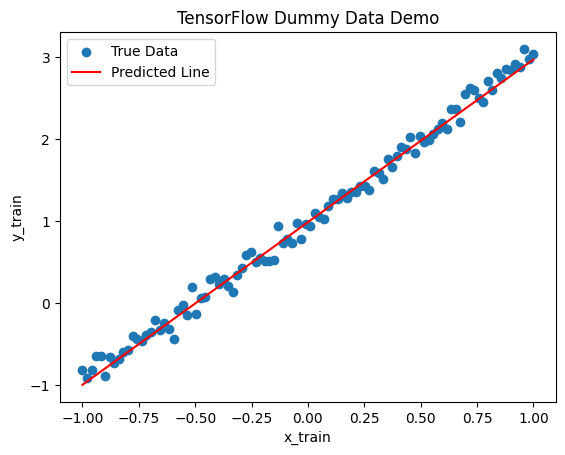

Model training is complete.


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate dummy data
np.random.seed(0)
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + 1 + 0.1 * np.random.randn(*x_train.shape)

# Reshape for TensorFlow
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Define a simple linear model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=500, verbose=0)

# Make predictions
y_pred = model.predict(x_train)

# Visualization
plt.scatter(x_train, y_train, label='True Data')
plt.plot(x_train, y_pred, color='red', label='Predicted Line')
plt.legend()
plt.title('TensorFlow Dummy Data Demo')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

print("Model training is complete.")


##### 2. PyTorch

In [ ]:
#! pip install torch torchvision torchaudio # MacOS
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu # linux

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab. 
- It is particularly popular for deep learning and scientific computing projects. 
- PyTorch is known for its dynamic computation graph, which makes it highly flexible and conducive to research and experimentation. 

Like TensorFlow, it also offers a wide array of tools for data loading, transformations, and visualization.

**Important Features Demonstrated in Python**

1. **Tensor Operations**: Similar to TensorFlow, PyTorch allows for a wide range of tensor operations.

In [4]:
import torch
a = torch.tensor([1, 2])
b = torch.tensor([3, 4])
c = a + b  # Output: tensor([4, 6])

print(c)

tensor([4, 6])


2. **Automatic Differentiation**: PyTorch also provides autograd for automatic differentiation.

In [5]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)  # Output: tensor(6.0)

tensor(6.)


3. **Neural Network API**: PyTorch has a `torch.nn` module for creating neural networks.

In [ ]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

4. **Model Training**: The training loop can be customized, offering more flexibility.

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(50):
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

5. **Saving and Loading Models**: It’s straightforward to save and load models.

In [ ]:
torch.save(model.state_dict(), 'model.pth')
model.load_state_dict(torch.load('model.pth'))

6. **GPU Acceleration**: Easily switch between CPU and GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

7. **Dynamic Computation Graph**: PyTorch creates dynamic computation graphs, making it easier to work with dynamic inputs and modify architectures during runtime.

**PyTorch Demo**

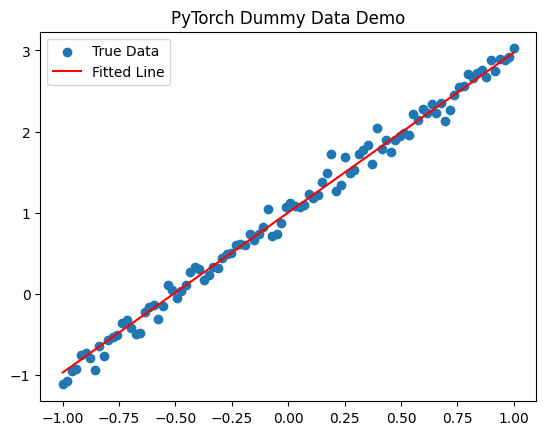

Model training is complete.


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate dummy data
torch.manual_seed(0)
x_train = torch.linspace(-1, 1, 100).reshape(-1, 1)
y_train = 2 * x_train + 1 + 0.1 * torch.randn(x_train.size())

# Define the model as a simple linear regression (y = ax + b)
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

model = SimpleLinearModel()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_train)
    
    # Compute loss
    loss = criterion(y_pred, y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

# Make predictions
y_pred = model(x_train).detach().numpy()

# Plot the results
plt.scatter(x_train, y_train, label='True Data')
plt.plot(x_train, y_pred, label='Fitted Line', color='red')
plt.legend()
plt.title("PyTorch Dummy Data Demo")
plt.show()

print("Model training is complete.")


##### 3. Keras

Keras is a high-level neural networks API that was developed to enable fast experimentation. 
- Initially, it was designed to work on top of other, lower-level libraries like TensorFlow, Theano, or CNTK. 
- Starting with TensorFlow 2.x, Keras is now the official high-level API for TensorFlow and comes bundled with it. 

Keras makes it easy to get started with deep learning, offering user-friendly and easy-to-understand APIs.

**Important Features Demo**

1. **Simple Model Building**: Keras allows for easy assembling of layers to create models.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

2. **Compilation**: Before training a model, you configure the learning process with compile.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

3. **Training**: Keras abstracts away much of the complexity in building a training loop.

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

4. **Evaluation and Prediction**: Simple methods to evaluate and make predictions.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
predictions = model.predict(new_data)

5. **Preprocessing and Data Augmentation**: Keras has utilities for image and text preprocessing.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20)

6. **Functional API**: For complex architectures, Keras offers a more functional approach.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(784,))
x = Dense(128, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

7. **Transfer Learning**: Keras provides pre-trained models for common tasks.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False)

8. **Customization**: Keras allows you to define custom layers, losses, and metrics.

In [ ]:
from tensorflow.keras import backend as K

def custom_loss(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

##### 4. NLTK (Natural Language Toolkit)

##### 5. Spacy

##### 6. Hugging Face Transformers

##### 7. OpenCV

##### 8. PIL (Pillow)

##### 9. TensorFlow Data API

##### 10. PyTorch DataLoader

##### 11. Albumentations

##### 12. imgaug

##### 13. MLflow 

##### 14. TensorBoard

----
### Note

##### Key differences and similarities between TensorFlow and PyTorch:

| Feature                     | TensorFlow                               | PyTorch                             |
|-----------------------------|------------------------------------------|-------------------------------------|
| **Origin**                  | Developed by Google Brain                | Developed by Facebook's FAIR lab    |
| **Graph Type**              | Static computation graph (Eager Execution available) | Dynamic computation graph       |
| **Ease of Debugging**       | Less intuitive due to static graph       | Easier due to dynamic graph        |
| **API Design**              | Higher-level APIs (Keras)                | More Pythonic, imperative style     |
| **Performance**             | Highly optimized for production          | Often considered better for research|
| **Hardware Acceleration**   | TPU support in addition to GPU and CPU   | Primarily GPU and CPU               |
| **Deployment**              | TensorFlow Serving, TensorFlow Lite, TensorFlow.js | TorchScript, ONNX                 |
| **Community and Popularity**| Larger community and more documentation  | Growing rapidly, especially in academia|
| **Automatic Differentiation**| AutoDiff through TensorFlow 2.x         | AutoDiff via Autograd              |
| **Serialization**           | Save and load using `SavedModel`         | Save and load using `torch.save` and `torch.load`|
| **Visualization Tools**     | TensorBoard                             | TensorBoard, Visdom                |
| **Learning Curve**          | Steeper learning curve                   | Considered easier to pick up       |

Both frameworks are highly capable and choosing between the two often comes down to specific project requirements, the team's familiarity with the framework, and whether the focus is on research or production.

#### Scenarios to use TensorFlow directly , without Keras

1. **Fine-grained Control**: If you need very specific behavior during training, evaluation, or inference that isn't directly provided by Keras, you might opt for TensorFlow's lower-level capabilities.

2. **Custom Training Loops**: For some advanced models or training techniques, you might want to write your own custom training loops. With TensorFlow, you can have precise control over the gradients, optimization steps, and other aspects of training.

3. **Advanced Architectures**: While Keras is very versatile, extremely complex architectures might be more naturally implemented directly in TensorFlow, especially if they involve intricate operations.

4. **Distributed Training**: If you're planning to distribute your training across multiple GPUs or machines (in a setup not supported by Keras's built-in methods), TensorFlow's distributed training capabilities can be invaluable.

5. **Use of TensorFlow Ecosystem**: TensorFlow has a vast ecosystem, including TensorFlow Extended (TFX) for production pipelines, TensorFlow Lite for mobile, TensorFlow.js for browser-based applications, and more. If you are deeply integrating with these tools, direct TensorFlow usage can be more natural.

6. **Optimizations and Performance**: If you are trying to optimize the runtime of your model or if you're deploying it to specific platforms where performance is critical, TensorFlow can provide more tools and options for optimization.

7. **Research Purposes**: If you're in a research setting where you're constantly trying out new algorithms or techniques, TensorFlow's flexibility can be more appropriate than the structured nature of Keras.

8. **TensorFlow Operations**: For projects that require extensive use of TensorFlow-specific operations not available in Keras or require customized operations using `tf.function` for performance, using TensorFlow directly is the way to go.

However, Keras and TensorFlow are not mutually exclusive; you can mix and match. For example, you can use Keras layers within a custom TensorFlow training loop.

##### Fix Tensorflow warning message

```
This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
```

Note: Virtual environment on Mac

1. Install Bazel https://bazel.build/install/os-x

2. Clone TensorFlow Repository (Interminal + venv)
    
    ```
    git clone https://github.com/tensorflow/tensorflow.git
    cd tensorflow
    ```

3. Configure the Build (Interminal + venv)
    
    ```
    ./configure
    ```